count    30.00000
mean      3.71000
std       0.42617
min       2.70000
25%       3.42500
50%       3.70000
75%       4.00000
max       4.40000
Name: RSQ_Mean, dtype: float64

Shapiro-Wilk test for normality: W=0.9672, p=0.4654


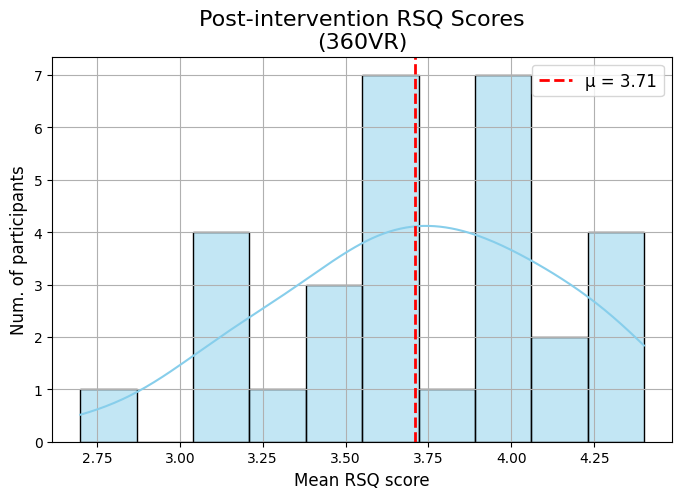

In [ ]:
# Relaxation State Questionnaire (RSQ) data analysis

# 360VR condition

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# load full data
data = pd.read_csv('post-intervention-values.csv', sep=';')

# minimise data to only participants in VR360 condition
data['participant_ID'] = pd.to_numeric(data['participant_ID'], errors='coerce')
RSQ = data[(data['participant_ID'] >= 31) & (data['participant_ID'] <= 60)]

# select the right columns
RSQ = RSQ[['RSQ_1', 'RSQ_2', 'RSQ_3', 'RSQ_4', 'RSQ_5', 'RSQ_6', 'RSQ_7', 'RSQ_8', 'RSQ_9', 'RSQ_10']].copy()

# convert to numeric
for col in RSQ.columns:
    RSQ[col] = pd.to_numeric(RSQ[col], errors='coerce')

# reverse score the negative statements: RSQ1, 2, 3, 10 
for item in ['RSQ_1', 'RSQ_2', 'RSQ_3', 'RSQ_10']:
    RSQ[item] = 6 - RSQ[item]

# compute mean RSQ score per participant
RSQ['RSQ_Mean'] = RSQ[['RSQ_1', 'RSQ_2', 'RSQ_3', 'RSQ_4', 'RSQ_5', 'RSQ_6', 'RSQ_7', 'RSQ_8', 'RSQ_9', 'RSQ_10']].mean(axis=1)
mean_RSQ = RSQ['RSQ_Mean'].mean()

# print the descriptive stats
print(RSQ['RSQ_Mean'].describe())

# shapiro wilk for normality
stats_post, p_shapiro_post = stats.shapiro(RSQ['RSQ_Mean'])
print(f"\nShapiro-Wilk test for normality: W={stats_post:.4f}, p={p_shapiro_post:.4f}")

# plot the histogram
plt.figure(figsize=(8,5))
sns.histplot(RSQ['RSQ_Mean'], kde=True, bins=10, color='skyblue', edgecolor='black')
plt.axvline(mean_RSQ, color='red', linestyle='--', linewidth=2, label=f'μ = {mean_RSQ:.2f}')
plt.legend(fontsize=12, loc='upper right')
plt.title('Post-intervention RSQ Scores\n(360VR)', fontsize=16)
plt.xlabel('Mean RSQ score', fontsize=12)
plt.ylabel('Num. of participants', fontsize=12)
plt.grid(True)
plt.show()


count    30.000000
mean      3.763333
std       0.439030
min       2.700000
25%       3.500000
50%       3.700000
75%       4.175000
max       4.600000
Name: RSQ_Mean, dtype: float64

Shapiro-Wilk test for normality: W=0.9680, p=0.4862


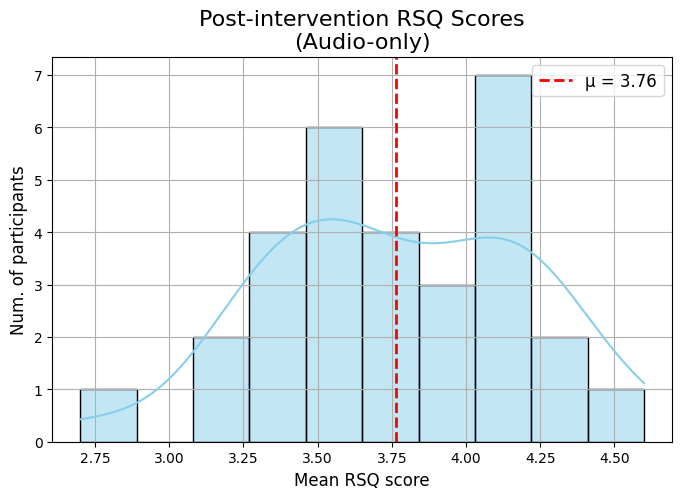

In [7]:
# audio-only

# minimise data to only participants in audio-only condition
data['participant_ID'] = pd.to_numeric(data['participant_ID'], errors='coerce')
RSQ = data[(data['participant_ID'] >= 61) & (data['participant_ID'] <= 90)]

# select the RSQ columns
RSQ = RSQ[['RSQ_1', 'RSQ_2', 'RSQ_3', 'RSQ_4', 'RSQ_5', 'RSQ_6', 'RSQ_7', 'RSQ_8', 'RSQ_9', 'RSQ_10']].copy()

# convert to numeric
for col in RSQ.columns:
    RSQ[col] = pd.to_numeric(RSQ[col], errors='coerce')

# reverse score the negative statements: RSQ1, 2, 3, 10 
for item in ['RSQ_1', 'RSQ_2', 'RSQ_3', 'RSQ_10']:
    RSQ[item] = 6 - RSQ[item]

# compute mean RSQ score per participant
RSQ['RSQ_Mean'] = RSQ[['RSQ_1', 'RSQ_2', 'RSQ_3', 'RSQ_4', 'RSQ_5', 'RSQ_6', 'RSQ_7', 'RSQ_8', 'RSQ_9', 'RSQ_10']].mean(axis=1)
mean_RSQ = RSQ['RSQ_Mean'].mean()

# descriptive stats
print(RSQ['RSQ_Mean'].describe())

# shapiro wilk for normality test
stats_post, p_shapiro_post = stats.shapiro(RSQ['RSQ_Mean'])
print(f"\nShapiro-Wilk test for normality: W={stats_post:.4f}, p={p_shapiro_post:.4f}")

# plot the histogram
plt.figure(figsize=(8,5))
sns.histplot(RSQ['RSQ_Mean'], kde=True, bins=10, color='skyblue', edgecolor='black')

plt.axvline(mean_RSQ, color='red', linestyle='--', linewidth=2, label=f'μ = {mean_RSQ:.2f}')
plt.legend(fontsize=12, loc='upper right')

plt.title('Post-intervention RSQ Scores\n(Audio-only)', fontsize=16)
plt.xlabel('Mean RSQ score', fontsize=12)
plt.ylabel('Num. of participants', fontsize=12)
plt.grid(True)
plt.show()


In [14]:
# T-test to compare RSQ scores 360VR vs audio-only

from scipy.stats import ttest_ind

# combine RSQ scores both groups
data['participant_ID'] = pd.to_numeric(data['participant_ID'], errors='coerce')
# get copy of 360VR group
rsq_vr = data[(data['participant_ID'] >= 31) & (data['participant_ID'] <= 60)].copy()
# get copy of audio-only group
rsq_audio = data[(data['participant_ID'] >= 61) & (data['participant_ID'] <= 90)].copy()

# select RSQ columns and again reverse if RSQ1, 2, 3 or 10
def compute_rsq_mean(df):
    cols = ['RSQ_1', 'RSQ_2', 'RSQ_3', 'RSQ_4', 'RSQ_5', 'RSQ_6', 'RSQ_7', 'RSQ_8', 'RSQ_9', 'RSQ_10']
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    for item in ['RSQ_1', 'RSQ_2', 'RSQ_3', 'RSQ_10']:
        df[item] = 6 - df[item]
    df['RSQ_Mean'] = df[cols].mean(axis=1)
    return df['RSQ_Mean']

rsq_vr_scores = compute_rsq_mean(rsq_vr)
rsq_audio_scores = compute_rsq_mean(rsq_audio)

# perform the t-test and print T-statistic and p-value
t_stat, p_val = ttest_ind(rsq_vr_scores, rsq_audio_scores, equal_var=False)
print(f"T= {t_stat:.2f}")
print(f"p= {p_val:.3f}")

T= -0.48
p= 0.635
